In [1]:
import pandas as pd 
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 


In [17]:
data_file = "data/time_series_covid_19_recovered.csv"
recover_df = pd.read_csv(data_file)
test= [recover_df.unique]

AttributeError: 'DataFrame' object has no attribute 'unique'

In [3]:
china_df = recover_df.loc[(recover_df["Country/Region"] == "Mainland China"), :]

In [4]:
china_df["January"] = china_df["1/31/20"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
china_df["February"] = china_df["2/20/20"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
china_df["Test"] = china_df["February"] - china_df["January"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
china_df = china_df.rename(columns = {"February":"Total","Test":"February"})

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


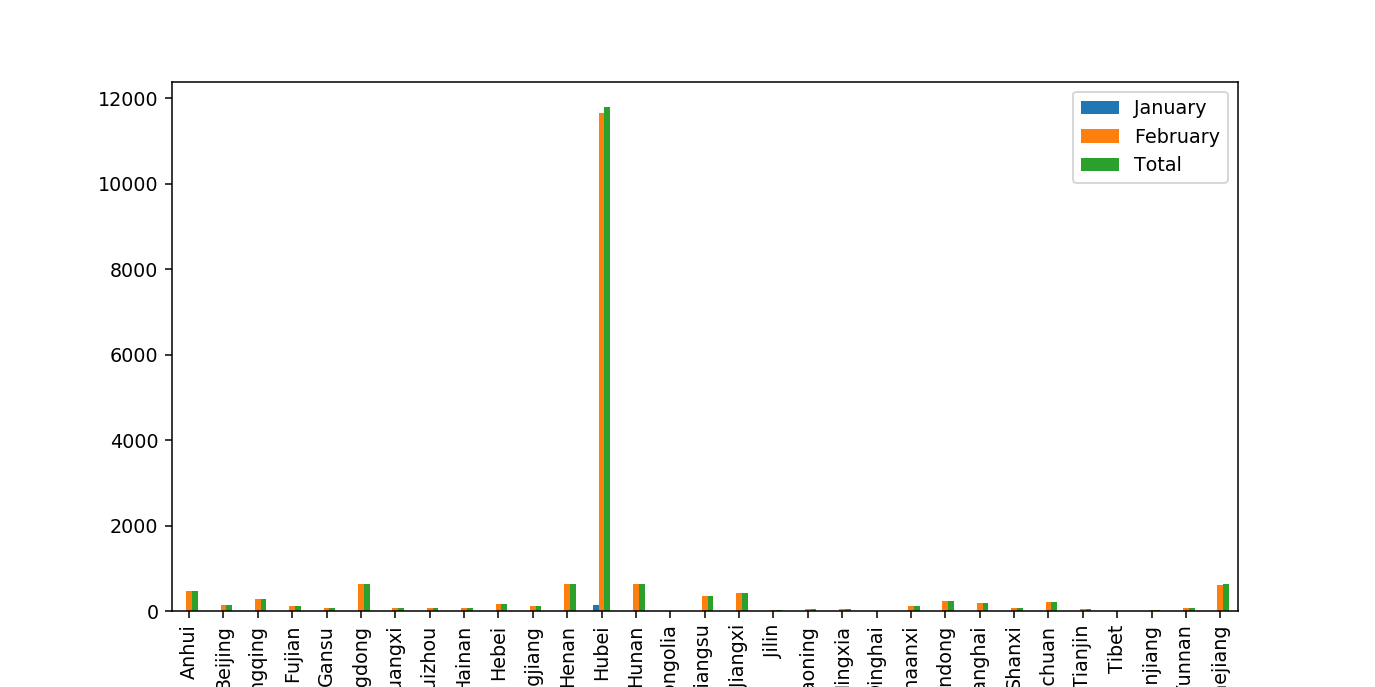

In [8]:
grouped_city = china_df.groupby(["Province/State"])["January","February","Total"].sum()
grouped_city
multi_plot = grouped_city.plot(kind="bar", figsize=(10,5)) 

In [10]:
without_hubei = china_df.loc[china_df["Province/State"] != "Hubei"]


C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


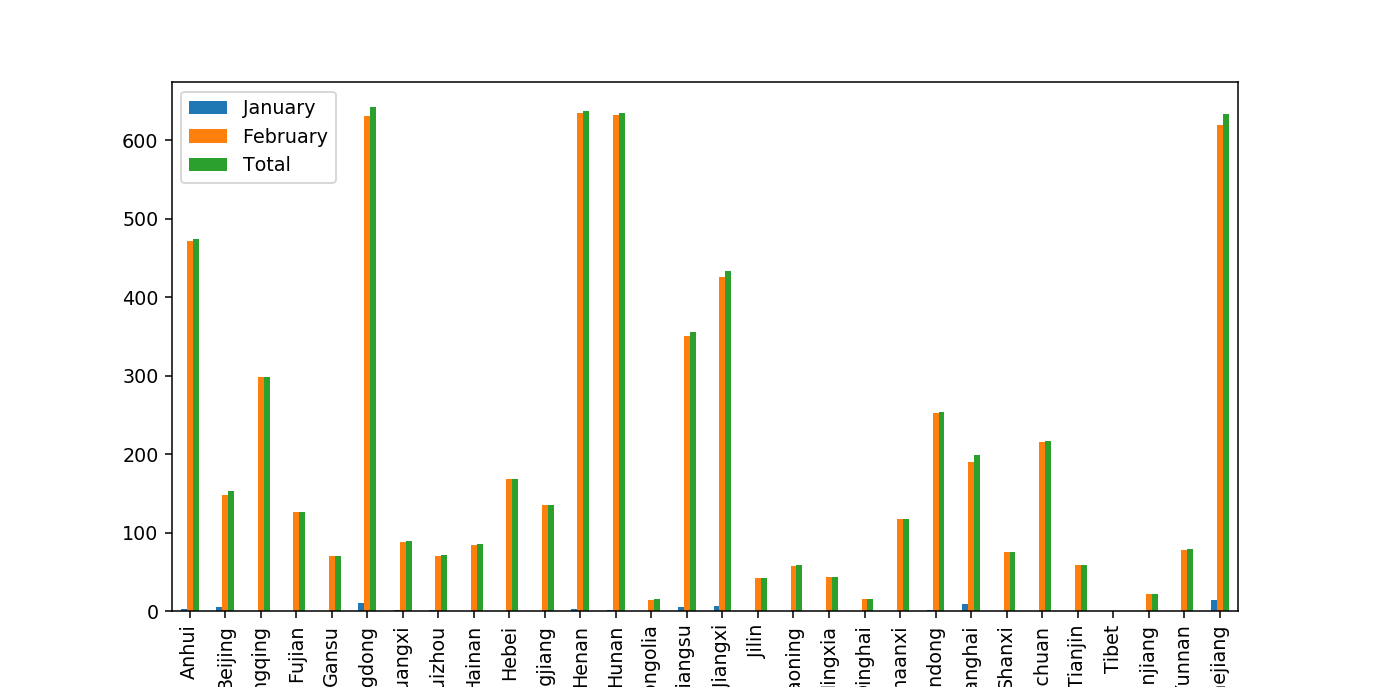

In [11]:
grouped_hubei = without_hubei.groupby(["Province/State"])["January","February","Total"].sum()
grouped_hubei
multi_plot = grouped_hubei.plot(kind="bar", figsize=(10,5)) 